<a href="https://colab.research.google.com/github/abdahsyakiroh/UAS_BDA_ABDAH-SYAKIROH-GUSTIAN_220660121144_IFIVD/blob/main/UAS_BDA_220660121144_Abdah_Syakiroh_Gustian_IFIVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
data = pd.read_csv('/content/milknew_data.csv')
data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [4]:
# menampilkan dimensi data
data.shape

(1059, 8)

In [24]:
# menampilkan informasi data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pH           1059 non-null   float64
 1   temperature  1059 non-null   int64  
 2   Taste        1059 non-null   int64  
 3   Odor         1059 non-null   int64  
 4   Fat          1059 non-null   int64  
 5   Turbidity    1059 non-null   int64  
 6   Colour       1059 non-null   int64  
 7   Grade        1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [6]:
data.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


<ipython-input-7-67ddad39ef98>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  c1=sns.countplot(x='Grade',data=data,palette="mako")


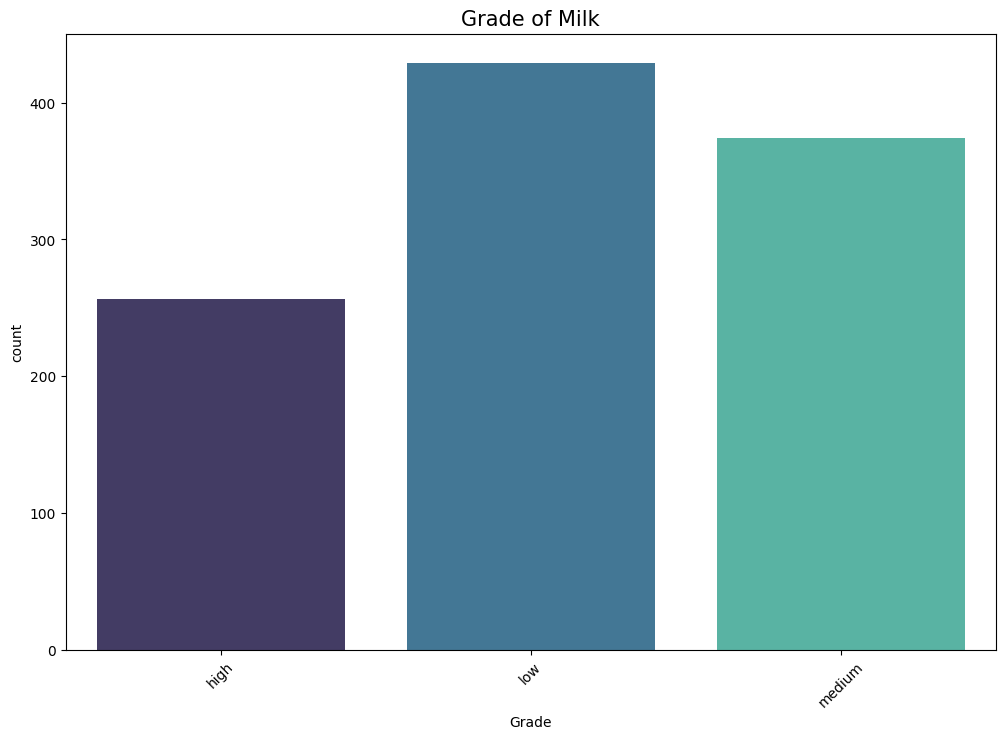

In [7]:
plt.figure(figsize=(12,8))
plt.title("Grade of Milk",fontsize=15)
c1=sns.countplot(x='Grade',data=data,palette="mako")
plt.xticks(rotation=45)
plt.show()

<ipython-input-8-8cc983975847>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  c1=sns.countplot(x='pH',data=data,palette="mako")


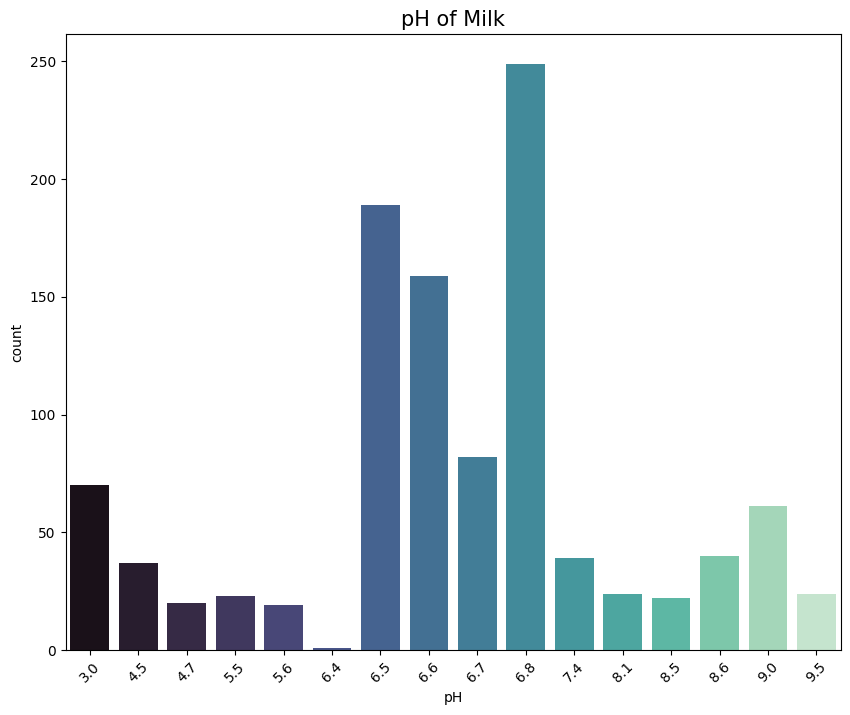

In [8]:
plt.figure(figsize=(10,8))
plt.title("pH of Milk",fontsize=15)
c1=sns.countplot(x='pH',data=data,palette="mako")
plt.xticks(rotation=45)
plt.show()

<ipython-input-9-15d7d0ad3dd3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  c1=sns.countplot(x='temperature',data=data,palette="mako")


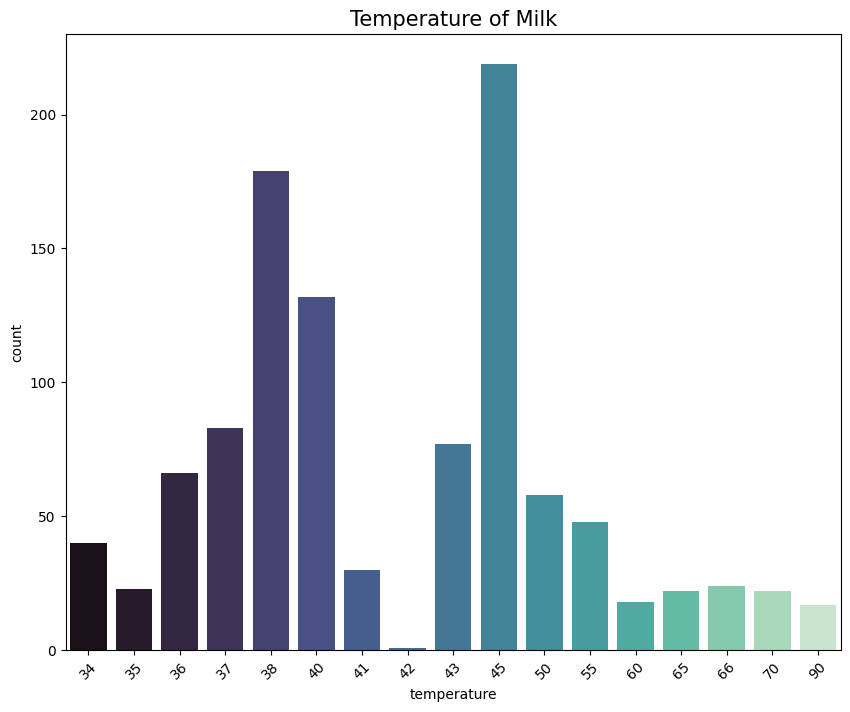

In [9]:
data = data.rename(columns={'Temprature':'temperature'})
plt.figure(figsize=(10,8))
plt.title("Temperature of Milk",fontsize=15)
c1=sns.countplot(x='temperature',data=data,palette="mako")
# c1.bar_label(c1.containers[0],size=12)
plt.xticks(rotation=45)
plt.show()

In [10]:
# mengecek apakah terdapat missing value dalam dataset
data.isnull().sum()

pH             0
temperature    0
Taste          0
Odor           0
Fat            0
Turbidity      0
Colour         0
Grade          0
dtype: int64

In [11]:
# mendefinisikan x dan y

array = data.values

x = array[:, 0:7]
y = array[:, 7]

In [12]:
# membagi data menjadi train dan test data
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=7)

In [13]:
# Scaling untuk X_train dan X_test
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

x_train

array([[-1.44147363, -0.61114527,  0.9303971 , ...,  0.69150921,
        -0.95949722,  0.74197262],
       [ 0.10381877,  0.07799134, -1.07480988, ...,  0.69150921,
         1.0422125 ,  0.74197262],
       [-0.11693729, -0.90648954,  0.9303971 , ...,  0.69150921,
        -0.95949722, -1.33975623],
       ...,
       [ 0.54533088,  2.0469531 , -1.07480988, ..., -1.44611233,
        -0.95949722,  0.74197262],
       [ 1.72269651, -0.11890483,  0.9303971 , ...,  0.69150921,
         1.0422125 , -0.87714982],
       [ 0.10381877, -0.4142491 ,  0.9303971 , ...,  0.69150921,
         1.0422125 ,  0.74197262]])

In [14]:
# mendefinisikan array kosong
models = []

# membuat array asosiatif berisi nama algoritma dan algoritma klasifikasinya
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('SVM', SVC(kernel='sigmoid')))
models.append(('KNN', KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=3)))

In [15]:
# mendefinisikan seed dan scoring untuk menguji model dengan testing data
seed = 7
scoring = 'accuracy'

In [16]:
results = []
names = []

# membagi data menjadi training dan validation set menggunakan k-fold cross validation dengan k = 10
for name, model in models:
  kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)

  # menguji akurasi dari masing masing model menggunakan validation data
  cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)

  results.append(cv_results)
  names.append(name)

  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

Decision Tree: 0.997633 (0.004734)
Random Forest: 0.997633 (0.004734)
SVM: 0.548964 (0.050937)
KNN: 0.990532 (0.010334)


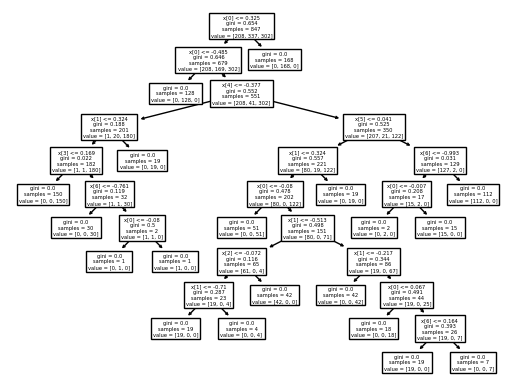

In [17]:
classifier = tree.DecisionTreeClassifier()
classifier = classifier.fit(x_train, y_train)
tree.plot_tree(classifier)

y_pred = classifier.predict(x_test)

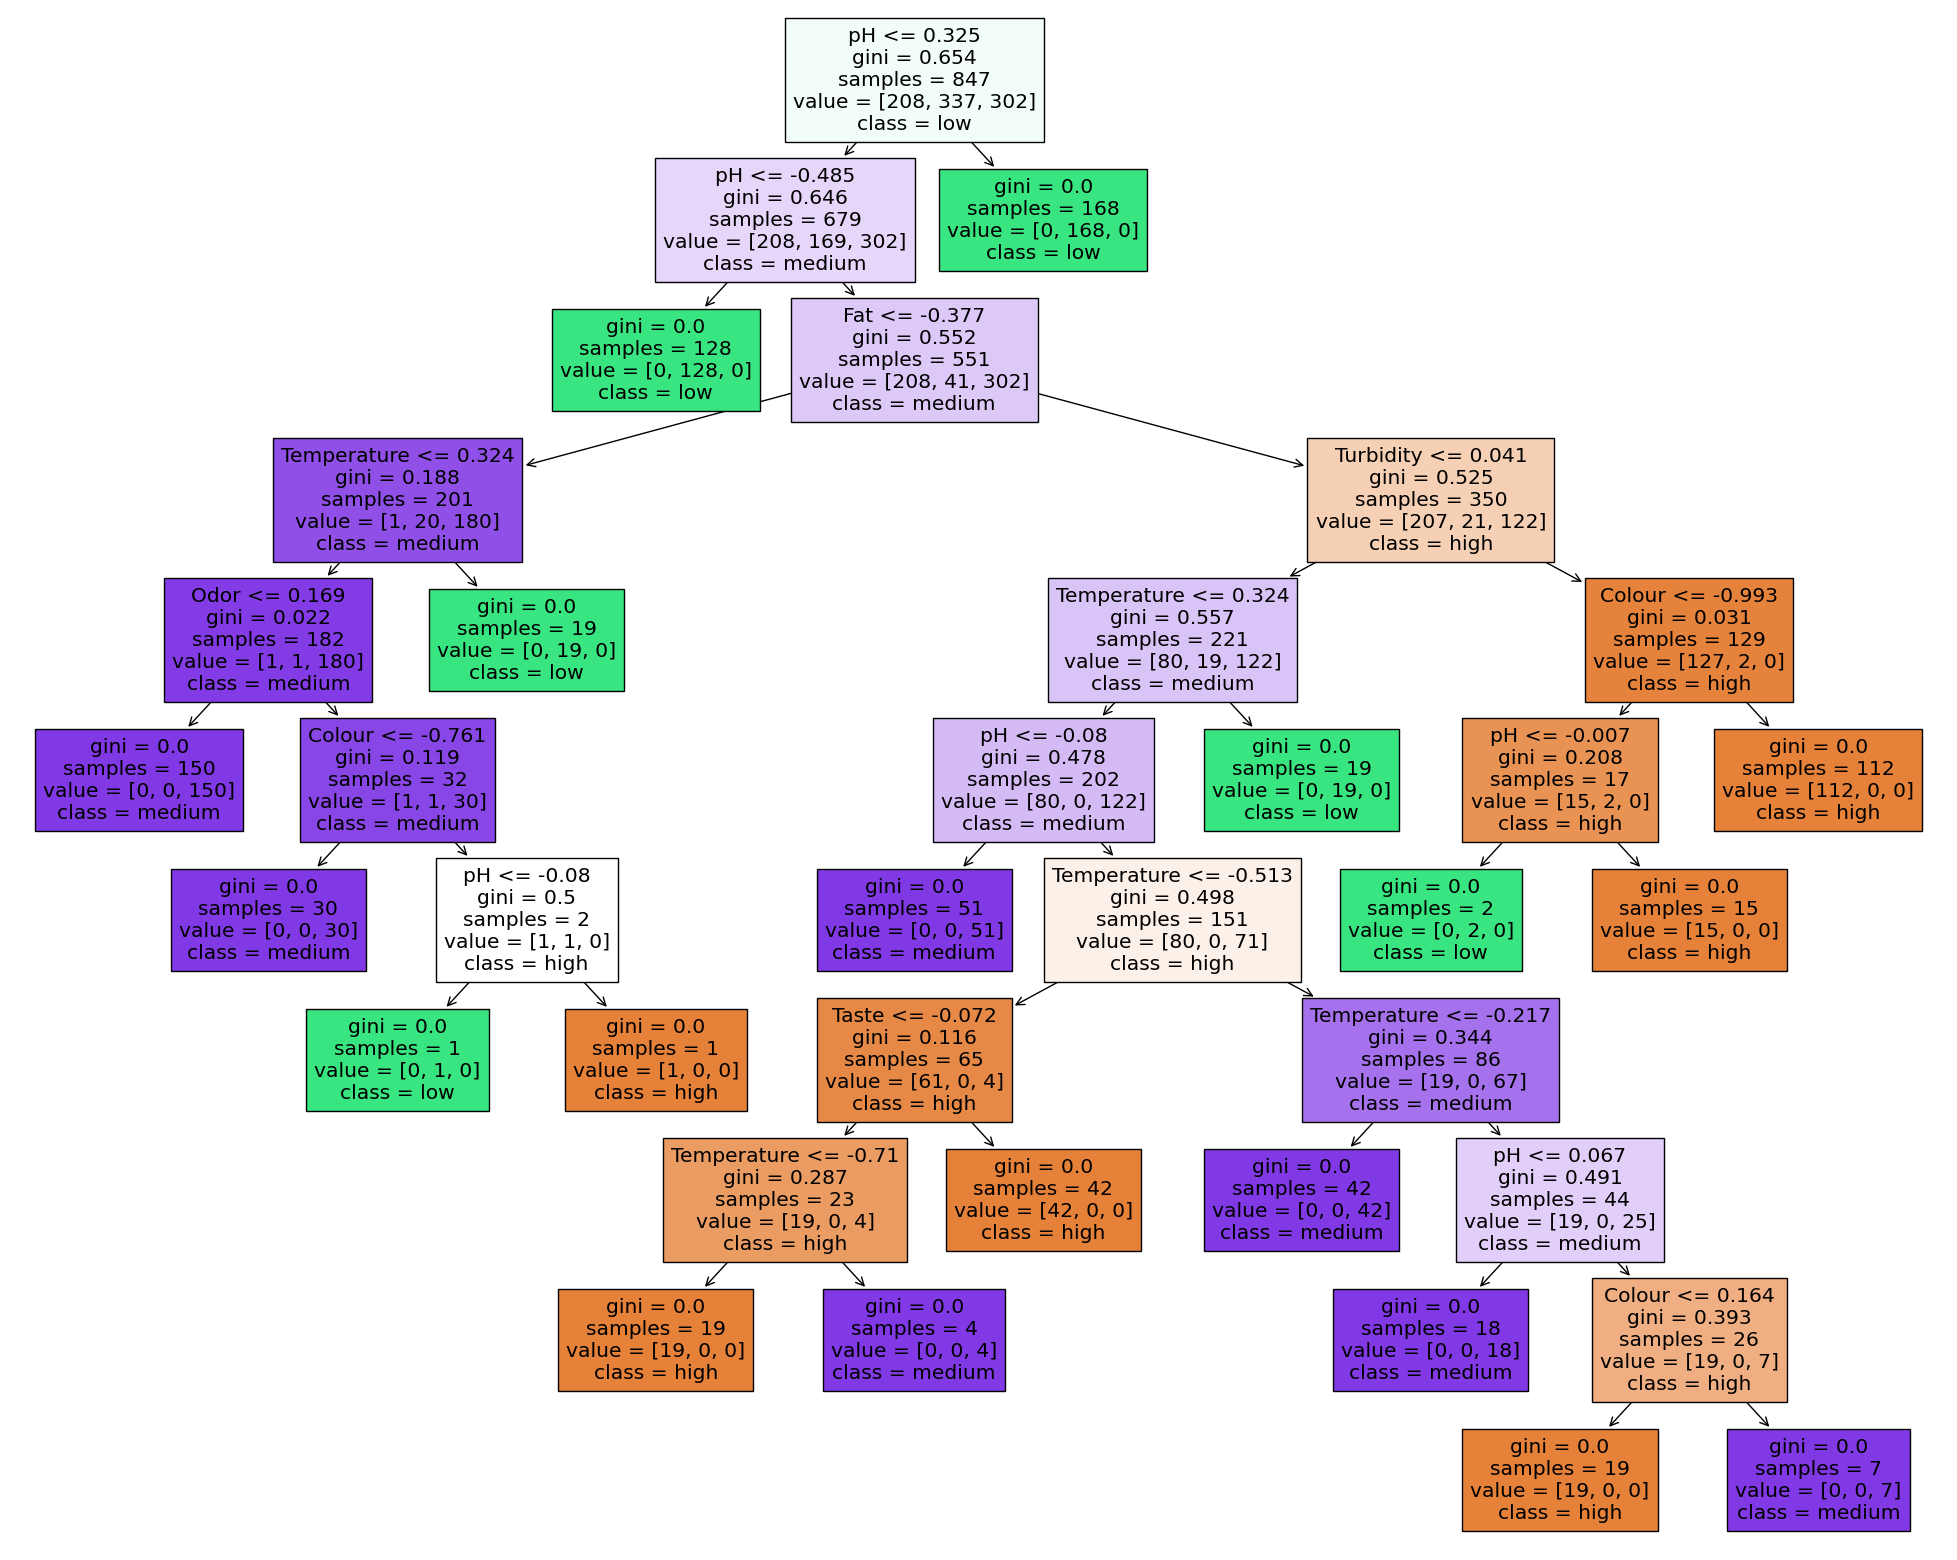

In [18]:
feature_names = ['pH', 'Temperature', 'Taste', 'Odor', 'Fat', 'Turbidity', 'Colour']
label_names = ['high', 'low', 'medium']
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classifier,
                   feature_names=feature_names,
                   class_names=label_names,
                   filled=True)

In [19]:
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

        high       0.73      0.98      0.84        48
         low       1.00      1.00      1.00        92
      medium       0.98      0.76      0.86        72

    accuracy                           0.92       212
   macro avg       0.91      0.91      0.90       212
weighted avg       0.93      0.92      0.92       212



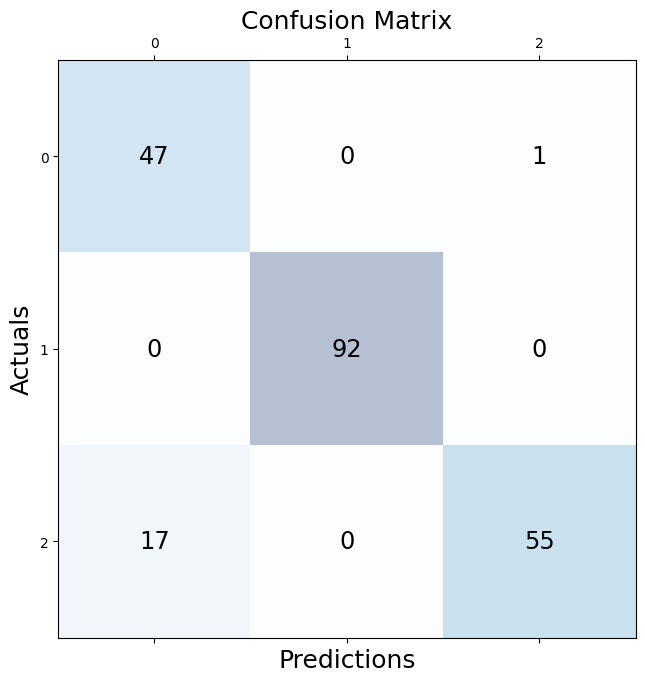

In [20]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()